In [7]:
import pyspark as ps
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import time
import datetime
import numpy as np
import scipy.stats as stats

In [8]:
spark = (ps.sql.SparkSession
         .builder
         .master('local[4]')
         .appName('lecture')
         .getOrCreate()
        )
sc = spark.sparkContext

In [9]:
league = pd.read_csv('league-tables/result.csv')
league

,year,title,Team,A,D,F,GD,L,P,Pos,Pts,W
0,2016/2017,Premier League 2016-2017,Chelsea,33,3,85,52,5,38,1,93,30
1,2016/2017,Premier League 2016-2017,Tottenham Hotspurs,26,8,86,60,4,38,2,86,26
2,2016/2017,Premier League 2016-2017,Manchester City,39,9,80,41,6,38,3,78,23
3,2016/2017,Premier League 2016-2017,Liverpool,42,10,78,36,6,38,4,76,22
4,2016/2017,Premier League 2016-2017,Arsenal,44,6,77,33,9,38,5,75,23
...,...,...,...,...,...,...,...,...,...,...,...,...
1338,1888/1889,First Division 1888-89,Everton,46,2,35,-11,11,22,8,20,9
1339,1888/1889,First Division 1888-89,Burnley,62,3,42,-20,12,22,9,17,7
1340,1888/1889,First Division 1888-89,Derby County,60,2,41,-19,13,22,10,16,7
1341,1888/1889,First Division 1888-89,Notts County,73,2,39,-34,15,22,11,12,5


In [10]:
cols = ['year', 'Team', 'Pos', 'P', 'Pts', 'W', 'D', 'L', 'F', 'A', 'GD', 'title']
league = league[cols]

In [11]:
champs = league[league['Pos'] == 1]
champs

,year,Team,Pos,P,Pts,W,D,L,F,A,GD,title
0,2016/2017,Chelsea,1,38,93,30,3,5,85,33,52,Premier League 2016-2017
20,2014/2015,Chelsea,1,38,87,26,9,3,73,32,41,Barclaycard Premier League 2014-2015
40,2013/2014,Manchester City,1,38,86,27,5,6,102,37,65,Barclaycard Premier League 2013-2014
60,2012/2013,Manchester United,1,38,89,28,5,5,86,43,43,Barclaycard Premier League 2012-2013
80,2011/2012,Manchester City,1,38,89,28,5,5,93,29,64,Barclaycard Premier League 2011-2012
...,...,...,...,...,...,...,...,...,...,...,...,...
1271,1919/1920,West Bromwich Albion,1,42,60,28,4,10,104,47,57,1919/1920 First Division
1293,1891/1892,Sunderland,1,26,42,21,0,5,93,36,57,First Division 1891-92
1307,1890/1891,Everton,1,22,29,14,1,7,63,29,34,First Division 1890-91
1319,1889/1890,Preston North End,1,22,33,15,3,4,71,30,41,First Division 1889-90


In [12]:
league_data = league.drop(['year', 'title', 'Pos'], axis=1)
league_num = league_data.select_dtypes(include=[np.number])

In [13]:
league_38 = league_num[league['P'] == 38]
league_42 = league_num[league['P'] == 42]
league_40 = league_num[league['P'] == 40]
league_26 = league_num[league['P'] == 26]
league_22 = league_num[league['P'] == 22]

In [14]:
league_22['Pts']=league_22['Pts'] + league_22['W']


/Users/kevinpark/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
league_26['Pts']=league_26['Pts'] + league_22['W']

/Users/kevinpark/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
norm_league_42 = league_42 * (38/42)
norm_league_40 = league_40 * (38/40)
norm_league_26 = league_26 * (38/26)
norm_league_22 = league_22 * (38/22)

norm_league = league_38.append(norm_league_42.append(norm_league_40.append(norm_league_26.append(norm_league_22))))

league_data[norm_league.columns] = norm_league
league_data['year'] = league['year']

league_data

,Team,P,Pts,W,D,L,F,A,GD,year
0,Chelsea,38.0,93.000000,30.000000,3.000000,5.000000,85.000000,33.000000,52.000000,2016/2017
1,Tottenham Hotspurs,38.0,86.000000,26.000000,8.000000,4.000000,86.000000,26.000000,60.000000,2016/2017
2,Manchester City,38.0,78.000000,23.000000,9.000000,6.000000,80.000000,39.000000,41.000000,2016/2017
3,Liverpool,38.0,76.000000,22.000000,10.000000,6.000000,78.000000,42.000000,36.000000,2016/2017
4,Arsenal,38.0,75.000000,23.000000,6.000000,9.000000,77.000000,44.000000,33.000000,2016/2017
...,...,...,...,...,...,...,...,...,...,...
1338,Everton,38.0,50.090909,15.545455,3.454545,19.000000,60.454545,79.454545,-19.000000,1888/1889
1339,Burnley,38.0,41.454545,12.090909,5.181818,20.727273,72.545455,107.090909,-34.545455,1888/1889
1340,Derby County,38.0,39.727273,12.090909,3.454545,22.454545,70.818182,103.636364,-32.818182,1888/1889
1341,Notts County,38.0,29.363636,8.636364,3.454545,25.909091,67.363636,126.090909,-58.727273,1888/1889


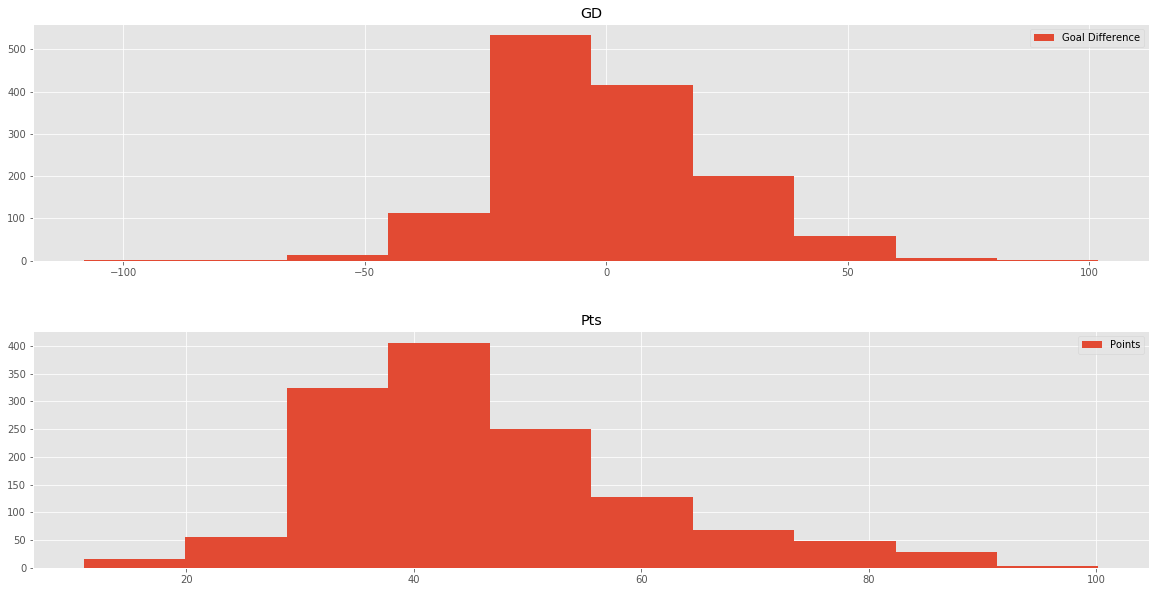

In [36]:
fig, ax = plt.subplots(2, figsize=[20,10])
league_data.hist(column='GD', ax=ax[0], label='Goal Difference')

league_data.hist(column='Pts', ax=ax[1], label='Points')
ax[0].legend()
ax[1].legend()

In [37]:
champs_data = champs.drop(['year', 'title', 'Pos'], axis=1)
champs_num = champs_data.select_dtypes(include=[np.number])

champs_38 = champs_num[champs['P'] == 38]
champs_42 = champs_num[champs['P'] == 42]
champs_40 = champs_num[champs['P'] == 40]
champs_26 = champs_num[champs['P'] == 26]
champs_22 = champs_num[champs['P'] == 22]

champs_22['Pts']=champs_22['Pts'] + champs_22['W']
champs_26['Pts']=champs_26['Pts'] + champs_26['W']

norm_champs_42 = champs_42 * (38/42)
norm_champs_40 = champs_40 * (38/40)
norm_champs_26 = champs_26 * (38/26)
norm_champs_22 = champs_22 * (38/22)

norm_champs = champs_38.append(norm_champs_42.append(norm_champs_40.append(norm_champs_26.append(norm_champs_22))))

champs_data[norm_champs.columns] = norm_champs
champs_data['year'] = champs['year']
champs_data

/Users/kevinpark/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/kevinpark/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,Team,P,Pts,W,D,L,F,A,GD,year
0,Chelsea,38.0,93.000000,30.000000,3.000000,5.000000,85.000000,33.000000,52.000000,2016/2017
20,Chelsea,38.0,87.000000,26.000000,9.000000,3.000000,73.000000,32.000000,41.000000,2014/2015
40,Manchester City,38.0,86.000000,27.000000,5.000000,6.000000,102.000000,37.000000,65.000000,2013/2014
60,Manchester United,38.0,89.000000,28.000000,5.000000,5.000000,86.000000,43.000000,43.000000,2012/2013
80,Manchester City,38.0,89.000000,28.000000,5.000000,5.000000,93.000000,29.000000,64.000000,2011/2012
...,...,...,...,...,...,...,...,...,...,...
1271,West Bromwich Albion,38.0,54.285714,25.333333,3.619048,9.047619,94.095238,42.523810,51.571429,1919/1920
1293,Sunderland,38.0,92.076923,30.692308,0.000000,7.307692,135.923077,52.615385,83.307692,1891/1892
1307,Everton,38.0,74.272727,24.181818,1.727273,12.090909,108.818182,50.090909,58.727273,1890/1891
1319,Preston North End,38.0,82.909091,25.909091,5.181818,6.909091,122.636364,51.818182,70.818182,1889/1890


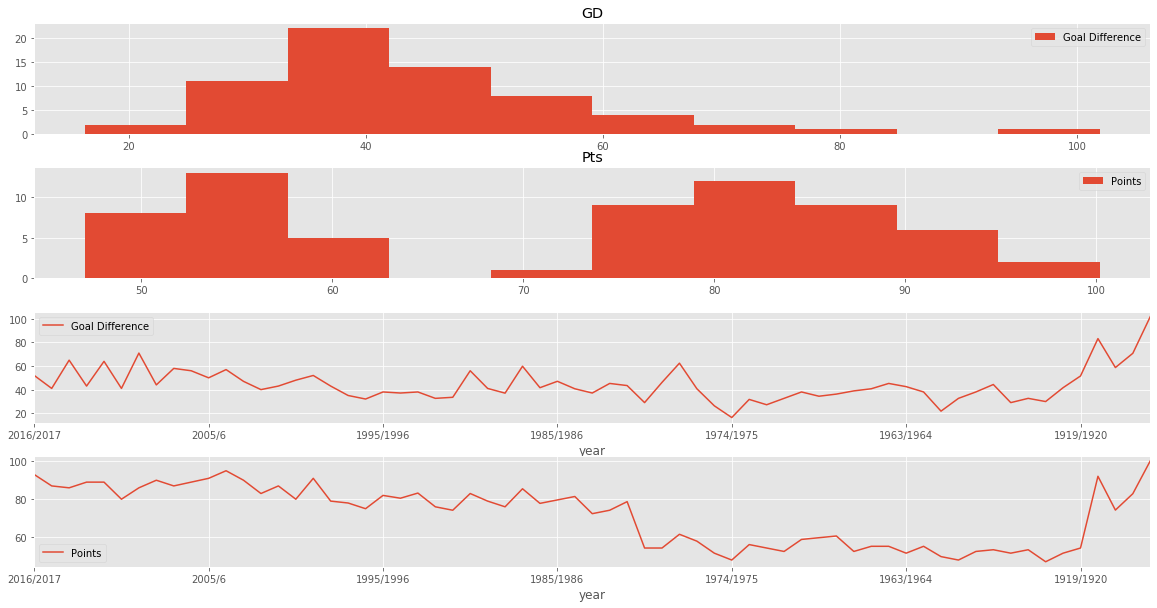

In [38]:
fig, ax = plt.subplots(4, figsize=[20,10])
champs_data.hist(column='GD', ax=ax[0], label='Goal Difference')

champs_data.hist(column='Pts', ax=ax[1], label='Points')
ax[0].legend()
ax[1].legend()

champs_data.plot(x = 'year', y='GD', ax=ax[2], label='Goal Difference')
champs_data.plot(x = 'year', y ='Pts', ax=ax[3], label='Points')
ax[2].legend()
ax[3].legend()

Text(0, 0.5, 'Points')

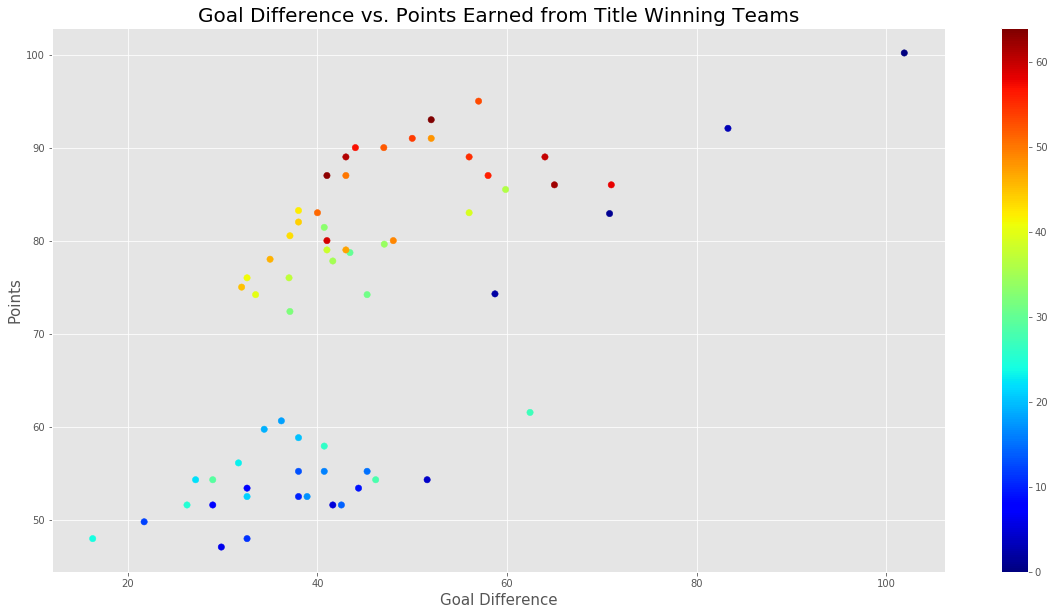

In [39]:
fig, ax = plt.subplots(figsize=[20,10])
t = np.arange(65)
champs_data.sort_values(by='year').plot.scatter(ax = ax, x='GD', y='Pts', s=40, c = t, cmap='jet')
ax.set_title('Goal Difference vs. Points Earned from Title Winning Teams', fontsize = 20)
ax.set_xlabel('Goal Difference', fontsize=15)
ax.set_ylabel('Points', fontsize=15)

Text(0, 0.5, 'Final Wins')

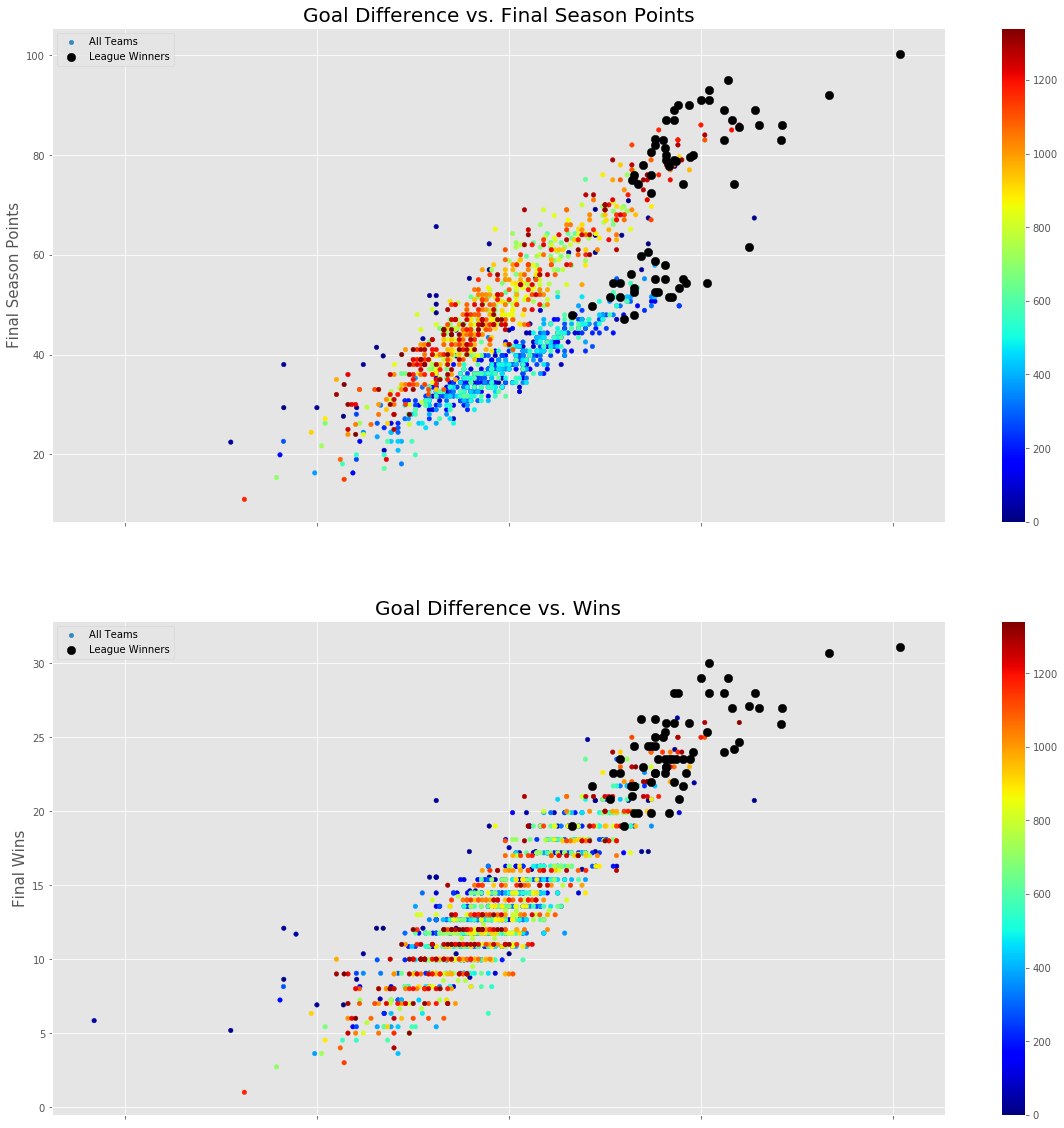

In [40]:
fig, ax = plt.subplots(2, sharex = True, figsize=[20,20])
t = np.arange(1343)
league_data.sort_values(by='year').plot.scatter(ax = ax[0], x='GD', y='Pts', s=20, c = t, cmap='jet', label = 'All Teams')
champs_data.sort_values(by='year').plot.scatter(ax = ax[0], x='GD', y='Pts', s=70, c = 'black', label = 'League Winners')
ax[0].set_title('Goal Difference vs. Final Season Points', fontsize = 20)
ax[0].set_ylabel('Final Season Points', fontsize=15)

league_data.sort_values(by='year').plot.scatter(ax = ax[1], x='GD', y='W', s=20, c = t, cmap='jet', label = 'All Teams')
champs_data.sort_values(by='year').plot.scatter(ax = ax[1], x='GD', y='W', s=70, c = 'black', label = 'League Winners')
ax[1].set_title('Goal Difference vs. Wins', fontsize = 20)
ax[1].set_xlabel('Goal Difference', fontsize=15)
ax[1].set_ylabel('Final Wins', fontsize=15)



Text(0, 0.5, 'Final Wins')

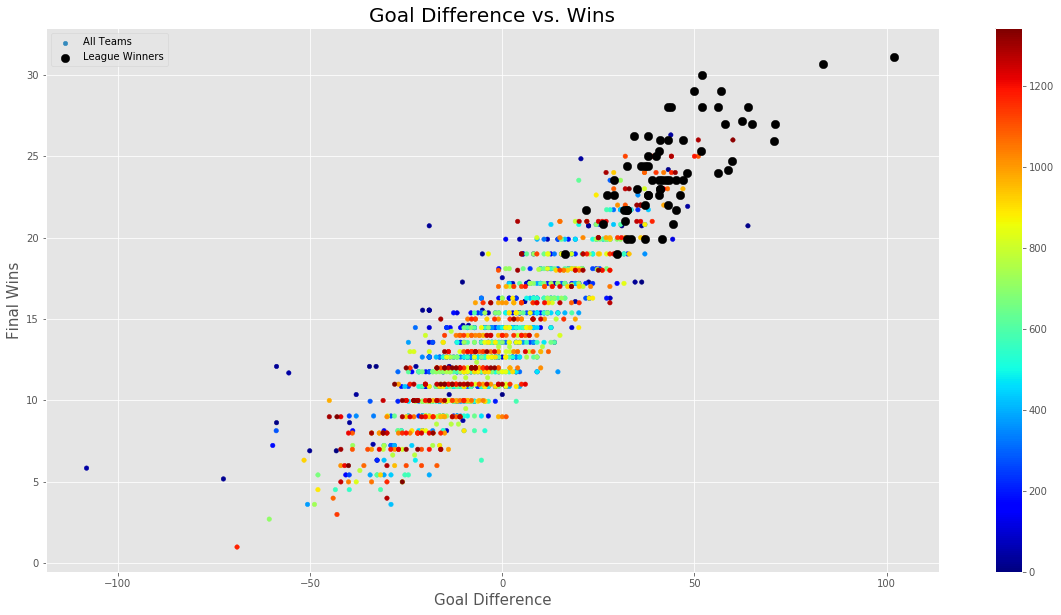

In [52]:
fig, ax = plt.subplots(figsize=[20,10])
t = np.arange(1343)
league_data.sort_values(by='year').plot.scatter(ax = ax, x='GD', y='W', s=20, c = t, cmap='jet', label = 'All Teams')
champs_data.sort_values(by='year').plot.scatter(ax = ax, x='GD', y='W', s=70, c = 'black', label = 'League Winners')
ax.set_title('Goal Difference vs. Wins', fontsize = 20)
ax.set_xlabel('Goal Difference', fontsize=15)
ax.set_ylabel('Final Wins', fontsize=15)

In [ ]:
champ_gd_means = champs_data.groupby('Team')['GD'].mean()
champ_pt_means = champs_data.groupby('Team')['Pts'].mean()

In [ ]:
champ_gd = champs_data['GD'].mean()
champ_pt = champs_data['Pts'].mean()

In [ ]:
gd_means = league_data.groupby('Team')['GD'].mean()
pt_means = league_data.groupby('Team')['Pts'].mean()
gd = league_data['GD'].mean()
pt = league_data['Pts'].mean()

In [ ]:
gd_dev = np.std(gd_means)
pt_dev = np.std(pt_means)

In [ ]:
normal_approx = stats.norm(gd, gd_dev)

In [42]:
normal_approx.pdf

<bound method rv_frozen.pdf of <scipy.stats._distn_infrastructure.rv_frozen object at 0x1a1cffac50>>

In [43]:
champs_data.iloc[31]

Team      Everton
P              38
Pts       81.4286
W         25.3333
D         5.42857
L          7.2381
F          79.619
A         38.9048
GD        40.7143
year    1984/1985
Name: 633, dtype: object

In [44]:
league_copy = league_data.copy()
champs_copy = champs_data.copy()

In [45]:
league_copy['GD'] = league_copy['GD']/38
champs_copy['GD'] = champs_copy['GD']/38

In [46]:
league_copy

,Team,P,Pts,W,D,L,F,A,GD,year
0,Chelsea,38.0,93.000000,30.000000,3.000000,5.000000,85.000000,33.000000,1.368421,2016/2017
1,Tottenham Hotspurs,38.0,86.000000,26.000000,8.000000,4.000000,86.000000,26.000000,1.578947,2016/2017
2,Manchester City,38.0,78.000000,23.000000,9.000000,6.000000,80.000000,39.000000,1.078947,2016/2017
3,Liverpool,38.0,76.000000,22.000000,10.000000,6.000000,78.000000,42.000000,0.947368,2016/2017
4,Arsenal,38.0,75.000000,23.000000,6.000000,9.000000,77.000000,44.000000,0.868421,2016/2017
...,...,...,...,...,...,...,...,...,...,...
1338,Everton,38.0,50.090909,15.545455,3.454545,19.000000,60.454545,79.454545,-0.500000,1888/1889
1339,Burnley,38.0,41.454545,12.090909,5.181818,20.727273,72.545455,107.090909,-0.909091,1888/1889
1340,Derby County,38.0,39.727273,12.090909,3.454545,22.454545,70.818182,103.636364,-0.863636,1888/1889
1341,Notts County,38.0,29.363636,8.636364,3.454545,25.909091,67.363636,126.090909,-1.545455,1888/1889


Text(0, 0.5, 'Final Season Points')

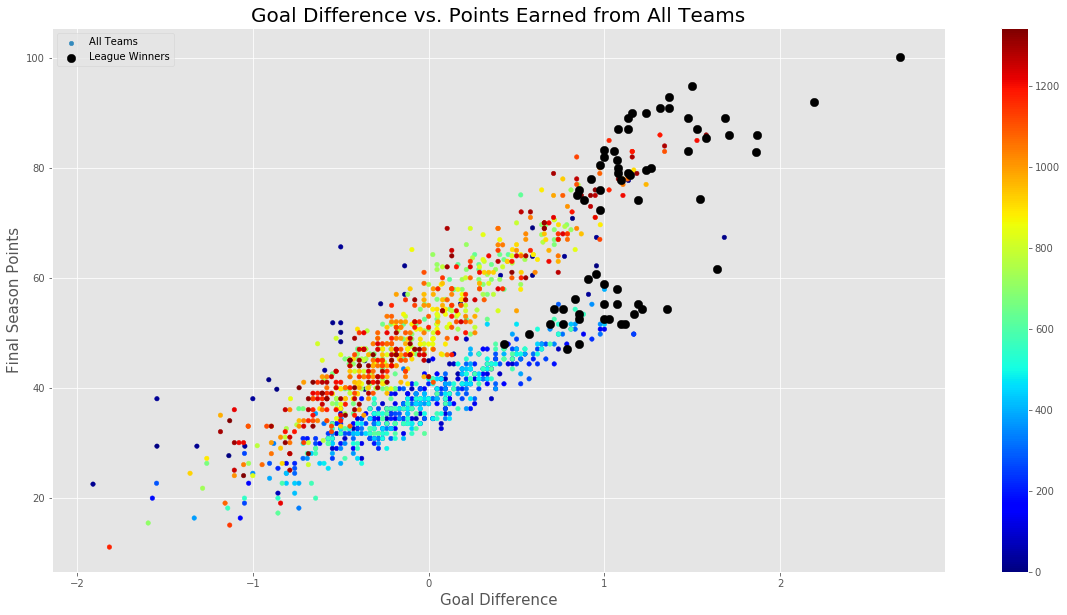

In [47]:
fig, ax = plt.subplots(figsize=[20,10])
t = np.arange(1343)
league_copy.sort_values(by='year').plot.scatter(ax = ax, x='GD', y='Pts', s=20, c = t, cmap='jet', label = 'All Teams')
champs_copy.sort_values(by='year').plot.scatter(ax = ax, x='GD', y='Pts', s=70, c = 'black', label = 'League Winners')
ax.set_title('Goal Difference vs. Points Earned from All Teams', fontsize = 20)
ax.set_xlabel('Goal Difference', fontsize=15)
ax.set_ylabel('Final Season Points', fontsize=15)

In [48]:
avg_points = league_data.groupby('year')['Pts'].mean()
a = np.arange(len(avg_points))

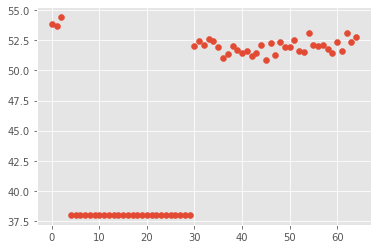

In [49]:
fig, ax = plt.subplots()
ax.scatter(a, avg_points)

In [50]:
league_data

,Team,P,Pts,W,D,L,F,A,GD,year
0,Chelsea,38.0,93.000000,30.000000,3.000000,5.000000,85.000000,33.000000,52.000000,2016/2017
1,Tottenham Hotspurs,38.0,86.000000,26.000000,8.000000,4.000000,86.000000,26.000000,60.000000,2016/2017
2,Manchester City,38.0,78.000000,23.000000,9.000000,6.000000,80.000000,39.000000,41.000000,2016/2017
3,Liverpool,38.0,76.000000,22.000000,10.000000,6.000000,78.000000,42.000000,36.000000,2016/2017
4,Arsenal,38.0,75.000000,23.000000,6.000000,9.000000,77.000000,44.000000,33.000000,2016/2017
...,...,...,...,...,...,...,...,...,...,...
1338,Everton,38.0,50.090909,15.545455,3.454545,19.000000,60.454545,79.454545,-19.000000,1888/1889
1339,Burnley,38.0,41.454545,12.090909,5.181818,20.727273,72.545455,107.090909,-34.545455,1888/1889
1340,Derby County,38.0,39.727273,12.090909,3.454545,22.454545,70.818182,103.636364,-32.818182,1888/1889
1341,Notts County,38.0,29.363636,8.636364,3.454545,25.909091,67.363636,126.090909,-58.727273,1888/1889


In [51]:
league_data[300:350]

,Team,P,Pts,W,D,L,F,A,GD,year
300,Manchester United,38.0,80.0,24.0,8.0,6.0,79.0,31.0,48.0,2000/2001
301,Arsenal,38.0,70.0,20.0,10.0,8.0,63.0,38.0,25.0,2000/2001
302,Liverpool,38.0,69.0,20.0,9.0,9.0,71.0,39.0,32.0,2000/2001
303,Leeds United,38.0,68.0,20.0,8.0,10.0,64.0,43.0,21.0,2000/2001
304,Ipswich Town,38.0,66.0,20.0,6.0,12.0,57.0,42.0,15.0,2000/2001
305,Chelsea,38.0,61.0,17.0,10.0,11.0,68.0,45.0,23.0,2000/2001
306,Sunderland,38.0,57.0,15.0,12.0,11.0,46.0,41.0,5.0,2000/2001
307,Aston Villa,38.0,54.0,13.0,15.0,10.0,46.0,43.0,3.0,2000/2001
308,Charlton Athletic,38.0,52.0,14.0,10.0,14.0,50.0,57.0,-7.0,2000/2001
309,Southampton,38.0,52.0,14.0,10.0,14.0,40.0,48.0,-8.0,2000/2001


In [32]:
league_data.groupby('year')['D'].sum().sort_values()[33:66]

year
1936/1937    208.095238
1938/1939    209.904762
1980/1981    213.523810
1983/1984    213.523810
2003/4       214.000000
2012/2013    216.000000
1981/1982    218.952381
2004/5       220.000000
1986/1987    220.761905
2010/2011    222.000000
1988/1989    224.000000
1974/1975    224.380952
1937/1938    226.190476
1998/1999    230.000000
1971/1972    233.428571
1972/1973    235.238095
1992/1993    235.238095
1996/1997    238.000000
1949/1950    238.857143
1977/1978    238.857143
1948/1949    240.666667
1994/1995    242.476190
1979/1980    242.476190
1991/1992    244.285714
1970/1971    244.285714
1976/1977    247.904762
1987/1988    250.800000
1968/1969    253.333333
1993/1994    256.952381
1969/1970    258.761905
1978/1979    260.571429
1973/1974    269.619048
Name: D, dtype: float64

In [33]:
league_data.groupby('year')['D'].sum().sort_values()[0:33]

year
1890/1891     55.272727
1891/1892     67.230769
1888/1889     76.000000
1889/1890     79.454545
2005/6       154.000000
2013/2014    156.000000
1946/1947    162.857143
2016/2017    168.000000
1959/1960    179.142857
2002/3       180.000000
1999/2000    184.000000
2014/2015    186.000000
2011/2012    186.000000
1965/1966    186.380952
1947/1948    188.190476
1919/1920    188.190476
1997/1998    190.000000
1964/1965    191.809524
2009/2010    192.000000
1984/1985    193.619048
2008/2009    194.000000
1963/1964    195.428571
2006/2007    196.000000
1995/1996    196.000000
1989/1990    198.000000
1985/1986    199.047619
2007/2008    200.000000
1982/1983    200.857143
1967/1968    200.857143
2001/2002    202.000000
2000/2001    202.000000
1962/1963    204.476190
1990/1991    206.000000
Name: D, dtype: float64